# Stereonets and geometric sample bias

Stereonets are a way of plotting structural data so spatial patterns become clear. They are a standard tool used in all structural geology, including borehole image analysis. Like any analysis, the robustness depends on understanding the data that goes into it. A key issue with fracture data picked from borehole image logs is that they are subject to geometric sample bias. Understanding how this bias impacts the data enables us to generate a more robust analysis of subsurface fault and fracture patterns. 

No handles with labels found to put in legend.


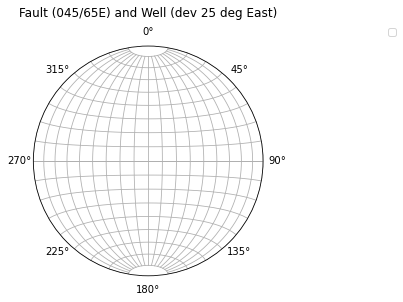

In [25]:
import mplstereonet as mpls
import matplotlib.pyplot as plt
%matplotlib inline

strike = 45
dip = 65

wellazimuth = 90  
wellplunge = 90 - 25 # 90 - deviation

fig = plt.figure(figsize=(14,5)) 

ax = fig.add_subplot(1,3,2, projection= 'equal_area_stereonet')

# plot the great circle
#ax.plane(strike,dip,linestyle='-',color='g',linewidth=3,label='Fracture - great circle')

# plot the pole
#ax.pole(strike,dip,marker='o',color='g',markersize=10,label='Fracture - pole')

# plot a line
#ax.line(wellplunge,wellazimuth,marker='^',color='k',markersize=10,label='Well')

ax.grid()
    
ax.set_title('Fault (045/65E) and Well (dev 25 deg East)',y=1.1)
ax.legend(bbox_to_anchor=(1.6, 1.1), numpoints=1)

plt.show() 

## Geometric sample bias

Seminal work by Terzaghi (1965) revealed a geometric bias generated 
by sampling a three-dimensional fracture network with a line. 
Simply put, fractures planes that are perpendicular to the line are 
very likely to be intersected whereas those parallel to the line are 
almost never intersected. This geometric sample bias generates a 'blind
zone' in fracture datasets where those which are near-parallel to the
scan-line or well-path are rarely sampled. This blind zone is 
sometimes also referred to as the 'well shadow'.

Terzaghi (1965) proposed a methodology quantifies the geometric sample 
bias using the acute angle (alpha) between the fracture plane and 
the line. Visualising the blind zone (where sin(alpha) +/- 0.3) and 
contours of sample bias (isogenic contours) on a stereonet enables
us to visually evaluate the degree that geometric sample bias in 
affects a fracture dataset.  

The image below includes seven case study wells in four geothermal reservoirs
located in two tectonic settings. It shows that all datasets are impacted by
geometric sample bias. Where there is a strong fracture cluster within or near
the blind zone, the overall impact on the apparent distribution of fracture 
orientations may be reduced (e.g., XXXXXX). However, less fractures will be 
sampled at low sin(alpha) so the numbers of fractures intersected by the well
do not reflect the number in the reservoir. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mplstereonet
%matplotlib inline

# example where we plot a well path, discuss the fractures most likely to be sampled and then plot the isogenic contours


# Corrected fracture data

A weighting may be applied based on the alpha angle which may correct
the sampled fracture population to something more reflective of actual
frequency. This kind of correction is common-place in modern image log
analysis and some form of the Terzaghi correction comes baked into 
most log analysis software. However, there are two key issues with these
corrections:

-   Correction may mislead interpretation by emphasising solitary 
    fractures that are not part of some significant but under-sampled 
    population, especially where the weighting factor approaches 
    infinity near sin α = 0. Priest (1993) recommends resolving this 
    by using an upper limit of sin α = 0.1 when weighting.

-   Correction can only be applied to those fractures which were sampled
    and therefore does a poor job of correcting in the blind zone where
    fractures are rarely sampled.

Image of corrected stereonets

In [2]:
%load_ext watermark
print('author:')
%watermark -a "Irene Wallis" -d
print('\n')
print('requirements:')
%watermark -v -p pandas,matplotlib,mplstereonet,watermark,fractoolbox 
print('\n')
%watermark -g

author:
Irene Wallis 2020-08-26


requirements:
CPython 3.7.7
IPython 7.15.0

pandas 1.0.5
matplotlib 3.2.2
mplstereonet 0.6.dev0
watermark 2.0.2
fractoolbox not installed


Git hash: 135e5f042bcef9cfccf175a25330e4dcbfa09fe7
